<a href="https://colab.research.google.com/github/Kapnist/-Analysez-les-besoins-de-votre-client-pour-son-Festival-de-films/blob/master/Copie_de_P2C5_Fusionnez_des_donn%C3%A9es_avec_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![openclassrooms](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/6204541/1+HnqdJ-5ofxiPP9HIxdNdpw.jpeg)

# Fusionnez des données avec Pandas

Votre tâche cette fois-ci va être de construire un jeu de données qui soit le plus complet possible. Pour cela, vous devez utiliser l’ensemble des jeux de données à votre disposition (les deux fichiers clients et le fichier de prêts) et appliquer l’ensemble des méthodes pour les fusionner ensemble.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# traitement réalisés précédemment
prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets.csv')

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

# création d'une variable risque
prets['risque'] = 'Non'
prets.loc[prets['taux_endettement'] > 35, 'risque'] = 'Oui'

# dataframe de profils clients
profil_clients = prets.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefices']].sum()
profil_clients.reset_index(inplace=True)
profil_clients.head()

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


Dans un premier temps, importons les deux fichiers clients : 

In [ ]:
clients_1 = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/clients.csv')
clients_1.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


In [ ]:
clients_2 = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/clients_suite.csv')
clients_2.head()

,identifiant,email,nom,genre
0,150,RochMireault@gustr.com,Roch Mireault,M
1,151,NathalieCormier@cuvox.de,Nathalie Cormier,F
2,152,VallisMainville@gustr.com,Vallis Mainville,M
3,153,DanielleNeufville@teleworm.us,Danielle Neufville,F
4,154,AllyrianeRacine@gustr.com,Allyriane Racine,F


La première mission va être de rassembler les deux dataframes `clients_1` et `clients_2` en un gros dataframe `clients` qui contiendra l'ensemble des informations de notre clientèle !

In [ ]:
# fusionons les deux dataframe(client_1 et client_2) avec la methode pd.concat
clients = pd.concat([clients_1, clients_2], ignore_index=True)


A présent, vous allez fusionner ce fichier clients avec les profils clients créés précédemment. Ces derniers se trouve dans le dataframe `profil_clients` qui a été généré en case 2. Vous pouvez nommer le dataframe final `data` :

In [ ]:
data = pd.merge(clients, profil_clients, on='identifiant', how='inner')
data.head()

,identifiant,email,nom,genre,remboursement,taux_endettement,cout_total,benefices
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,1130.05,30.80,271212.0,131.99
1,1,GuyMarois@fleckens.hu,Guy Marois,M,1487.85,28.02,389715.0,206.66
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,552.54,29.50,132609.6,53.71
3,3,RussellDurand@armyspy.com,Russell Durand,M,586.03,34.80,105485.4,44.57
4,4,AlexisRiel@rhyta.com,Alexis Riel,M,423.61,28.70,101666.4,51.21


Le service marketing de la banque nous a fourni un fichier dans lequel se trouve l'age de TOUS les clients de notre banque.

In [ ]:
clients_age = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/client_age.csv')
clients_age.head()

,identifiant,age
0,0,54
1,1,23
2,2,30
3,3,42
4,4,47


Ajoutez l'information de l'age au dataframe `data`. Cependant, il semble que certains des clients ayant contracté un prêt n'apparaissent pas dans ce fichier. On souhaite cependant garder **toutes** les informations de notre dataframe `data` : choisissez donc avec précaution les arguments !

In [ ]:
data = pd.merge(data, clients_age, on="identifiant", how= "left")
data

,identifiant,email,nom,genre,remboursement,taux_endettement,cout_total,benefices,age_x,age_y,age
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M,1130.05,30.80,271212.0,131.99,54,54.0,54.0
1,1,GuyMarois@fleckens.hu,Guy Marois,M,1487.85,28.02,389715.0,206.66,23,23.0,23.0
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M,552.54,29.50,132609.6,53.71,30,30.0,30.0
3,3,RussellDurand@armyspy.com,Russell Durand,M,586.03,34.80,105485.4,44.57,42,42.0,42.0
4,4,AlexisRiel@rhyta.com,Alexis Riel,M,423.61,28.70,101666.4,51.21,47,47.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...
223,223,ClaudeDandonneau@jourrapide.com,Claude Dandonneau,F,672.13,31.60,161311.2,83.95,25,30.0,30.0
224,224,ApollineMichaud@superrito.com,Apolline Michaud,F,1486.99,29.05,380592.0,196.75,31,27.0,27.0
225,225,PascalineBeaudry@rhyta.com,Pascaline Beaudry,F,876.43,37.20,157757.4,77.04,44,29.0,29.0
226,226,FleurCaouette@jourrapide.com,Fleur Caouette,F,2910.96,57.10,698630.4,331.85,39,26.0,26.0


Bien joué ! Que diriez vous de comparer vos réponses [avec la correction](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P2/P2C5%20-%20Fusionnez%20des%20donn%C3%A9es%20avec%20Pandas%20-%20correction.ipynb) à présent ?

In [ ]:
 # Nous allons à present realiser des graphyque pour étudier la tendance de notre dataframe
import matplotlib.pyplot as mp

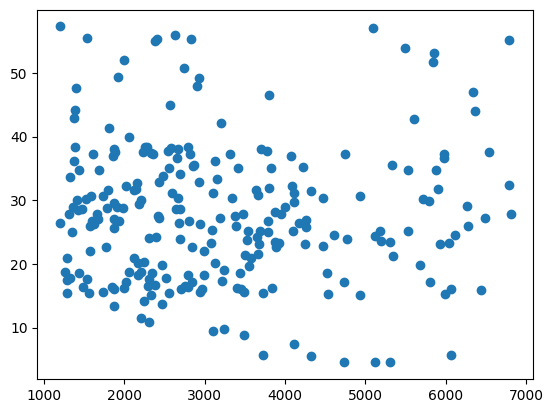

In [ ]:
mp.scatter(prets['revenu'], prets['taux_endettement'])

<BarContainer object of 228 artists>

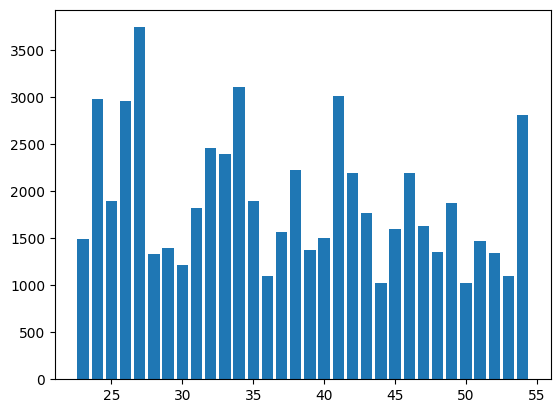

In [ ]:
mp.bar(height=data['remboursement'], x=data['age'])